In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:

n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

@qml.qnode(dev)
def oracle_amp(combo):
    """Prepare the uniform superposition and apply the oracle.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns: 
        array[complex]: The quantum state (amplitudes) after applying the oracle.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.QFT(wires=range(n_bits))
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    return qml.state()

In [3]:
oracle_amp([0,1,0,0])

tensor([ 0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j,
         0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
         0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j], requires_grad=True)

In [25]:
n_bits = 4

def diffusion_matrix():
    """Return the diffusion matrix.

    Returns: 
        array[float]: The matrix representation of the diffusion operator.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    # FORM A DIFFERENCE OF MATRICES
    psi = np.ones(2**n_bits, dtype=complex)/np.sqrt(2**n_bits)
    return 2*np.outer(psi, psi) - np.identity(2**n_bits)
    

@qml.qnode(dev)
def difforacle_amp(combo):
    """Apply the oracle and diffusion matrix to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle
        and diffusion.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.QFT(wires=range(n_bits))
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    qml.QubitUnitary(diffusion_matrix(), wires=range(n_bits))
    
    return qml.state()

dev2 = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev2)
def uniform():
    for w in range(n_bits):
        qml.Hadamard(w)
    #qml.QFT(wires=range(n_bits))
    return qml.state()

In [5]:
oracle_matrix([0,1,0,0])

tensor([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 

In [6]:
oracle_matrix([0,1,0,0]).shape

(16, 16)

In [31]:
np.outer(psi,psi)

tensor([[0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j],
        [0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j],
        [0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j],
        [0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625+0.j],
        [0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j, 0.0625+0.j,
         0.0625

In [26]:
diffusion_matrix()

tensor([[-0.875+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j],
        [ 0.125+0.j, -0.875+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j],
        [ 0.125+0.j,  0.125+0.j, -0.875+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j],
        [ 0.125+0.j,  0.125+0.j,  0.125+0.j, -0.875+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j],
        [ 0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j, -0.875+0.j,
          0.125

In [22]:
2*np.outer(uniform(),uniform()) - np.identity(16)

tensor([[-0.875+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j],
        [ 0.125+0.j, -0.875+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j],
        [ 0.125+0.j,  0.125+0.j, -0.875+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j],
        [ 0.125+0.j,  0.125+0.j,  0.125+0.j, -0.875+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
          0.125+0.j],
        [ 0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j, -0.875+0.j,
          0.125

In [27]:
psi = np.ones(2**n_bits, dtype=complex)/np.sqrt(2**n_bits)

In [28]:
psi

tensor([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j], requires_grad=True)

In [39]:
n_bits = 8
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

def diffusion_matrix():
    """Return the diffusion matrix.

    Returns: 
        array[float]: The matrix representation of the diffusion operator.
    """
    psi_piece = (1/2**n_bits)*np.ones(2**n_bits)
    ident_piece = np.eye(2**n_bits)
    return (2*psi_piece - ident_piece)

@qml.qnode(dev)
def grover_circuit(combo, num_steps):
    """Apply the Grover operator num_steps times to the uniform superposition 
       and return the state.

    Args:
        combo (list[int]): A list of bits representing the secret combination.
        num_steps (int): The number of iterations of the Grover operator
            our circuit is to perform.

    Returns: 
        array[complex]: The quantum state (amplitudes) after repeated Grover 
        iterations.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.QFT(wires=range(n_bits)) #prepare superposition
    
    U_o = oracle_matrix(combo)
    D = diffusion_matrix()
    for i in range(num_steps):
        qml.QubitUnitary(U_o, wires=range(n_bits))
        qml.QubitUnitary(D, wires=range(n_bits))

    return qml.state()

In [44]:
combo = [1,0,1,1,1,0,1,0]
np.ravel_multi_index(combo, [2]*len(combo))

186

In [46]:
np.sqrt(2**n_bits)*np.pi/4

12.566370614359172

In [42]:
for s in range(100):
    state = grover_circuit(combo, s)
    print(f'step {s} -- max element in state: {np.argmax(state)},  max value in state:  {np.max(state)}')

step 0 -- max element in state: 0,  max value in state:  (0.0625+0j)
step 1 -- max element in state: 186,  max value in state:  (0.1865234375+0j)
step 2 -- max element in state: 186,  max value in state:  (0.3076324462890625+0j)
step 3 -- max element in state: 186,  max value in state:  (0.4239346981048584+0j)
step 4 -- max element in state: 186,  max value in state:  (0.5336129702627659+0j)
step 5 -- max element in state: 186,  max value in state:  (0.6349535397603177+0j)
step 6 -- max element in state: 186,  max value in state:  (0.7263729601991145+0j)
step 7 -- max element in state: 186,  max value in state:  (0.8064428031348001+0j)
step 8 -- max element in state: 186,  max value in state:  (0.8739119772715045+0j)
step 9 -- max element in state: 186,  max value in state:  (0.9277262767633414+0j)
step 10 -- max element in state: 186,  max value in state:  (0.96704485318075+0j)
step 11 -- max element in state: 186,  max value in state:  (0.9912533537672089+0j)
step 12 -- max element i

In [47]:
def oracle(combo):
    """Implement an oracle using a multi-controlled X gate.
    
    Args:
        combo (list): A list of bits representing the secret combination.
    """
    combo_str = ''.join(str(j) for j in combo)
    ##################
    # YOUR CODE HERE #
    ##################
    qml.MultiControlledX(control_wires = query_register, wires = aux, control_values = combo_str)


In [48]:
def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.
    
    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)

def diffusion():
    """Implement the diffusion operator using the Hadamard transform and 
    multi-controlled X."""

    ##################
    # YOUR CODE HERE #
    ##################
    hadamard_transform(query_register)
    qml.MultiControlledX(control_wires = query_register, 
                         wires = aux, 
                         control_values = '0'*len(query_register))
                         
    hadamard_transform(query_register)


In [54]:
def grover_iter(combo, num_steps):
    """Run Grover search for a given secret combination and a number of iterations.
    
    Args:
        combo (list[int]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns: 
        array[float]: Probability for observing different outcomes.
    """
    n_bits = len(combo)
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register+aux
    dev = qml.device('default.qubit', wires=all_wires)

    def hadamard_transform(my_wires):
        """Apply the Hadamard transform on a given set of wires.

        Args:
            my_wires (list[int]): A list of wires on which the Hadamard transform will act.
        """
        for wire in my_wires:
            qml.Hadamard(wires=wire)

    def diffusion():
        """Implement the diffusion operator using the Hadamard transform and 
        multi-controlled X."""

        ##################
        # YOUR CODE HERE #
        ##################
        hadamard_transform(query_register)
        qml.MultiControlledX(control_wires = query_register, 
                             wires = aux, 
                             control_values = '0'*len(query_register))

        hadamard_transform(query_register)
    def oracle(combo):
        """Implement an oracle using a multi-controlled X gate.

        Args:
            combo (list): A list of bits representing the secret combination.
        """
        combo_str = ''.join(str(j) for j in combo)
        ##################
        # YOUR CODE HERE #
        ##################
        qml.MultiControlledX(control_wires = query_register, wires = aux, control_values = combo_str)


    @qml.qnode(dev)
    def inner_circuit():
        ##################
        # YOUR CODE HERE #
        ##################
        # IMPLEMENT THE GROVER CIRCUIT
        hadamard_transform(query_register)
        qml.PauliX(aux)
        qml.Hadamard(aux)
        
        for step in range(num_steps):
            oracle(combo)
            diffusion()
        
        return qml.probs(wires=query_register)
    
    return inner_circuit()


In [60]:
ic = grover_iter([0,0,0,0], 3)

In [70]:
import scipy
from scipy.signal import find_peaks


In [81]:
n_list = range(3,8)
opt_steps = []

for n_bits in n_list:
    combo = "0"*n_bits # A simple combination
    step_list = range(1,10) # Try out some large number of steps
    #print(combo)
    ##################
    # YOUR CODE HERE #
    ##################
    
    probs_0 =[ grover_iter(combo, step)[0] for step in step_list]
    #print(probs_0)
    #print(np.argmax(probs_0))
    #print(find_peaks(probs_0))
    opt_steps.append(find_peaks(probs_0)[0][0] + 1)

In [82]:
opt_steps

[2, 3, 4, 6, 8]

In [85]:
log2S = np.log2(opt_steps)

In [86]:
import matplotlib.pyplot as plt

In [89]:
log2S

tensor([1.       , 1.5849625, 2.       , 2.5849625, 3.       ], requires_grad=True)

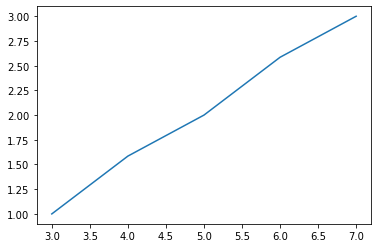

In [87]:
plt.plot(n_list, log2S)

In [88]:
scipy.stats.linregress(n_list, log2S)

LinregressResult(slope=0.5, intercept=-0.4660149997115375, rvalue=0.9982720188529153, pvalue=8.620446429172385e-05, stderr=0.01699250014423151, intercept_stderr=0.08829562079229135)

In [162]:
def grover_multi_iter(combos, num_steps):
    """Run Grover search for a given secret combination and a number of iterations.
    
    Args:
        combo (list[int]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns: 
        array[float]: Probability for observing different outcomes.
    """
    n_bits = len(combos[0])
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register+aux
    
    # print(n_bits)
    # print(query_register)
    # print(aux)
    # print(combos)
    
    dev = qml.device('default.qubit', wires=all_wires)

    def hadamard_transform(my_wires):
        """Apply the Hadamard transform on a given set of wires.

        Args:
            my_wires (list[int]): A list of wires on which the Hadamard transform will act.
        """
        for wire in my_wires:
            qml.Hadamard(wires=wire)

    def diffusion():
        """Implement the diffusion operator using the Hadamard transform and 
        multi-controlled X."""

        ##################
        # YOUR CODE HERE #
        ##################
        hadamard_transform(query_register)
        qml.MultiControlledX(control_wires = query_register, 
                             wires = aux, 
                             control_values = '0'*len(query_register))
        hadamard_transform(query_register)
        
    def oracle(combo):
        """Implement an oracle using a multi-controlled X gate.

        Args:
            combo (list): A list of bits representing the secret combination.
        """
        combo_str = ''.join(str(j) for j in combo)
        ##################
        # YOUR CODE HERE #
        ##################
        qml.MultiControlledX(control_wires = query_register, wires = aux, control_values = combo_str)

    def oracle_multi(combos):
        """Implement multi-solution oracle using sequence of multi-controlled X gates.

        Args:
            combos (list[list[int]]): A list of solutions.
        """
        for i, combo in enumerate(combos):
            #print(f'combo [{i}] = {combo}')
            combo_str = ''.join(str(j) for j in combo)
            ##################
            # YOUR CODE HERE #
            ##################
            # print(query_register)
            # print(aux)
            # print(combo_str)
            qml.MultiControlledX(control_wires = query_register,
                                 wires =aux,
                                 control_values = combo_str)
        
    @qml.qnode(dev)
    def inner_circuit():
        ##################
        # YOUR CODE HERE #
        ##################
        # IMPLEMENT THE GROVER CIRCUIT
        hadamard_transform(query_register)
        qml.PauliX(aux)
        qml.Hadamard(aux)
        
        for step in range(num_steps):
            oracle_multi(combos)
            diffusion()
        
        return qml.probs(wires=query_register)
    
    return inner_circuit()


In [163]:
grover_multi_iter([[0,0,0,0,0,0,0], [0,0,0,0,0,0,1]], 7)

tensor([0.45372462, 0.45372462, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00073453, 0.00073453,
        0.00073453, 0.00073453, 0.00073453, 0.00

In [195]:
m_list = range(5)
opt_steps = []
n_bits = 8

for m_bits in m_list:
    #print(m_bits)
    combos = [[int(s) for s in np.binary_repr(j, n_bits)] for j in range(2**m_bits)]
    step_list = range(1,20)
    ##################
    # YOUR CODE HERE #
    ##################
    #print(combos) #combo = [0, 0, 0, ... 0] is always one of the solutions above
#     for s in step_list:
#         print(f'grover: {s}')
#         print(grover_multi_iter(combos, s))
#         opt_steps.append(find_peaks(probs_0)[0][0] + 1)
    
    probs_0 =[ grover_multi_iter(combos, step)[0] for step in step_list] # because [0, 0, ... 0] is always a combo, take the 0th element
    #print(probs_0)
    #try:
    opt_steps.append(find_peaks(probs_0)[0][0] + 1)
    #except IndexError as e:
        #print(probs_0)
    #    raise e
    #opt_steps.append(local_max_arg(probs_0))
    
print("The optimal number of Grover steps for the number of solutions in", [2**x for x in m_list], "is", opt_steps, ".")


The optimal number of Grover steps for the number of solutions in [1, 2, 4, 8, 16] is [12, 8, 6, 4, 3] .


In [170]:
probs_0

[tensor(0.11816406, requires_grad=True),
 tensor(0.22711182, requires_grad=True),
 tensor(0.24032974, requires_grad=True),
 tensor(0.14542603, requires_grad=True),
 tensor(0.03137292, requires_grad=True),
 tensor(0.00509519, requires_grad=True),
 tensor(0.09122822, requires_grad=True),
 tensor(0.20902229, requires_grad=True),
 tensor(0.24804547, requires_grad=True)]

In [176]:
def plot_and_fit(opt_steps, n_list):
    log2S = np.log2(opt_steps)
    plt.plot(n_list, log2S)
    return scipy.stats.linregress(n_list, log2S)

LinregressResult(slope=-0.5, intercept=3.5509775004326936, rvalue=-0.9982720188529153, pvalue=8.620446429172385e-05, stderr=0.01699250014423151, intercept_stderr=0.04162295480753675)

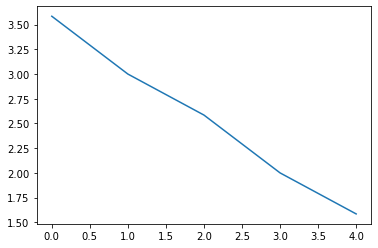

In [196]:
plot_and_fit(opt_steps, m_list)

In [197]:
np.log2(np.pi*np.sqrt(2**n_bits)/4)

3.651496129472319